<a href="https://colab.research.google.com/github/ThiagoManguinho/Analise_EstatisticaF1/blob/main/lhbs_tmrs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do DataSet de PitStops de Fórmula 1



Importando o data set

In [50]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Pitstop_data_all.csv to Pitstop_data_all (3).csv


Leitura do arquivo.csv

In [51]:
pitstopsF1 = pd.read_csv('Pitstop_data_all.csv')
pitstopsF1.head(40)

,Year,Race,Driver_First_Name,Driver_Last_Name,Driver_Acronym,Driver_Number,Team,Lap_Pitted,Pit_Number,Pit_Time,Race_Number
0,2021,Bahrain,Sergio,Perez,PER,11,Red Bull Racing Honda,2,1,23.993,1
1,2021,Bahrain,Pierre,Gasly,GAS,10,AlphaTauri Honda,4,1,38.338,1
2,2021,Bahrain,Fernando,Alonso,ALO,14,Alpine Renault,11,1,24.373,1
3,2021,Bahrain,Lando,Norris,NOR,4,McLaren Mercedes,12,1,24.899,1
4,2021,Bahrain,Charles,Leclerc,LEC,16,Ferrari,12,1,24.925,1
5,2021,Bahrain,Lance,Stroll,STR,18,Aston Martin Mercedes,12,1,24.884,1
6,2021,Bahrain,Antonio,Giovinazzi,GIO,99,Alfa Romeo Racing Ferrari,12,1,31.998,1
7,2021,Bahrain,Lewis,Hamilton,HAM,44,Mercedes,13,1,24.839,1
8,2021,Bahrain,Daniel,Ricciardo,RIC,3,McLaren Mercedes,13,1,24.688,1
9,2021,Bahrain,Kimi,RÃ¤ikkÃ¶nen,RAI,7,Alfa Romeo Racing Ferrari,13,1,24.107,1


# Exploração dos dados:

## Probabilidades Simples:

Probabilidade 1:

In [52]:
colunas_esperadas = {'Pit_Time', 'Year', 'Team'}
if not colunas_esperadas.issubset(set(pitstopsF1.columns)):
    raise ValueError(f"Colunas ausentes no CSV. Esperado: {colunas_esperadas}, Encontrado: {set(pitstopsF1.columns)}")

pitstopsF1['Pit_Time'] = pd.to_numeric(pitstopsF1['Pit_Time'], errors='coerce')

df_2021 = pitstopsF1[pitstopsF1['Year'] == 2021]
somaPits2021 = df_2021['Pit_Time'].sum()
mediaPits2021 = somaPits2021 / len(pitstopsF1[pitstopsF1['Year']== 2021])

df_mercedes_2021 = df_2021[df_2021['Team'] == 'Mercedes']
media_mercedes_2021 = df_mercedes_2021['Pit_Time'].mean()

abaixo_mediaMerc = len(df_mercedes_2021[df_mercedes_2021['Pit_Time'] < mediaPits2021])
probMerc_abaixoMed = abaixo_mediaMerc/len(df_mercedes_2021)

print(f"A média dos pitstops do ano de 2021 é de: {mediaPits2021:.4f}\n")
print(f"A média dos pitstops da Mercedes do ano de 2021 é de: {media_mercedes_2021:.4f}")
print(f"A probabilidade da Mercedes ter um pitstop abaixo da média no ano de 2021: " + str(round(probMerc_abaixoMed*100,4)) + '%')

A média dos pitstops do ano de 2021 é de: 21.5627

A média dos pitstops da Mercedes do ano de 2021 é de: 24.1181
A probabilidade da Mercedes ter um pitstop abaixo da média no ano de 2021: 22.093%


Probabilidade 2:

In [53]:
df_redbull_2021 = df_2021[df_2021['Team'] == 'Red Bull Racing Honda']
media_redbull_2021 = df_redbull_2021['Pit_Time'].mean()

abaixo_mediaRB = len(df_redbull_2021[df_redbull_2021['Pit_Time'] < mediaPits2021])
probRB_abaixoMed = abaixo_mediaRB/len(df_redbull_2021)

print(f"A média dos pitstops do ano de 2021 é de: {mediaPits2021:.4f}\n")
print(f"A média dos pitstops da RedBull do ano de 2021 é de: {media_redbull_2021:.4f}")
print(f"A probabilidade da RedBull Racing ter um pitstop abaixo da média no ano de 2021: " + str(round(probRB_abaixoMed*100,4)) + '%')

A média dos pitstops do ano de 2021 é de: 21.5627

A média dos pitstops da RedBull do ano de 2021 é de: 23.9780
A probabilidade da RedBull Racing ter um pitstop abaixo da média no ano de 2021: 26.7442%


Probabilidade 3:

In [54]:
df_haas_2021 = df_2021[df_2021['Team'] == 'Haas Ferrari']
media_haas_2021 = df_haas_2021['Pit_Time'].mean()

abaixo_mediaH = len(df_haas_2021[df_haas_2021['Pit_Time'] < mediaPits2021])
probH_abaixoMed = abaixo_mediaH/len(df_haas_2021)

print(f"A média dos pitstops do ano de 2021 é de: {mediaPits2021:.4f}\n")
print(f"A média dos pitstops da Haas do ano de 2021 é de: {media_haas_2021:.4f}")
print(f"A probabilidade da equipe Haas ter um pitstop abaixo da média no ano de 2021: " + str(round(probH_abaixoMed*100,4)) + '%')

A média dos pitstops do ano de 2021 é de: 21.5627

A média dos pitstops da Haas do ano de 2021 é de: 26.1227
A probabilidade da equipe Haas ter um pitstop abaixo da média no ano de 2021: 12.1951%


##Probabilidade com União

Probabilidade 1:

In [55]:
prob_leclerc2021 = len(df_2021[df_2021['Driver_Last_Name']=='Leclerc']) / len(df_2021)
print('A probabilidade de Leclerc fazer um pitstop no ano de 2021 é de: ' + str(round(prob_leclerc2021*100,4)) + '%')

prob_sainz2021 = len(df_2021[df_2021['Driver_Last_Name']=='Sainz']) / len(df_2021)
print('A probabilidade de Sainz fazer um pitstop no ano de 2021 é de: ' + str(round(prob_sainz2021*100,4)) + '%\n')

gp_com_ambosls = df_2021[df_2021['Driver_Last_Name'].isin(['Leclerc', 'Sainz'])]['Race'].nunique()
prob_intersecaols = gp_com_ambosls / len(df_2021)

prob_uniao_ls = prob_leclerc2021 + prob_sainz2021 - prob_intersecaols
print('A probabilidade de Sainz ou Leclerc fazerem um pitstop no ano de 2021 é de: ' + str(round(prob_uniao_ls*100,4)) + '%')

A probabilidade de Leclerc fazer um pitstop no ano de 2021 é de: 4.6366%
A probabilidade de Sainz fazer um pitstop no ano de 2021 é de: 4.6366%

A probabilidade de Sainz ou Leclerc fazerem um pitstop no ano de 2021 é de: 6.6416%


Probabilidade 2:

In [56]:
prob_hamilton2021 = len(df_2021[df_2021['Driver_Last_Name']=='Hamilton']) / len(df_2021)
print('A probabilidade de Hamilton fazer um pitstop no ano de 2021 é de: ' + str(round(prob_hamilton2021*100,4)) + '%')

prob_bottas2021 = len(df_2021[df_2021['Driver_Last_Name']=='Bottas']) / len(df_2021)
print('A probabilidade de Bottas fazer um pitstop no ano de 2021 é de: ' + str(round(prob_bottas2021*100,4)) + '%\n')

gp_com_amboshb = df_2021[df_2021['Driver_Last_Name'].isin(['Hamilton', 'Bottas'])]['Race'].nunique()
prob_intersecaohb = gp_com_amboshb / len(df_2021)

prob_uniao_hb = prob_hamilton2021 + prob_bottas2021 - prob_intersecaohb
print('A probabilidade de Hamilton ou Bottas fazerem um pitstop no ano de 2021 é de: ' + str(round(prob_uniao_hb*100,4)) + '%')

A probabilidade de Hamilton fazer um pitstop no ano de 2021 é de: 5.8897%
A probabilidade de Bottas fazer um pitstop no ano de 2021 é de: 4.8872%

A probabilidade de Hamilton ou Bottas fazerem um pitstop no ano de 2021 é de: 8.1454%


Probabilidade 3:

In [57]:
prob_vettel2021 = len(df_2021[df_2021['Driver_Last_Name']=='Vettel']) / len(df_2021)
print('A probabilidade de Vettel fazer um pitstop no ano de 2021 é de: ' + str(round(prob_vettel2021*100,4)) + '%')

prob_stroll2021 = len(df_2021[df_2021['Driver_Last_Name']=='Stroll']) / len(df_2021)
print('A probabilidade de Stroll fazer um pitstop no ano de 2021 é de: ' + str(round(prob_stroll2021*100,4)) + '%\n')

gp_com_ambosvs = df_2021[df_2021['Driver_Last_Name'].isin(['Vettel', 'Stroll'])]['Race'].nunique()
prob_intersecaovs = gp_com_ambosvs / len(df_2021)

prob_uniao_vs = prob_vettel2021 + prob_stroll2021 - prob_intersecaovs
print('A probabilidade de Vettel ou Stroll fazerem um pitstop no ano de 2021 é de: ' + str(round(prob_uniao_vs*100,4)) + '%')

A probabilidade de Vettel fazer um pitstop no ano de 2021 é de: 5.3885%
A probabilidade de Stroll fazer um pitstop no ano de 2021 é de: 4.386%

A probabilidade de Vettel ou Stroll fazerem um pitstop no ano de 2021 é de: 7.1429%


##Probabilidade com Intersecção

Probabilidade 1:

In [58]:
pits_mercedes_2021 = len(df_mercedes_2021)
pits_redbull_2021 = len(df_redbull_2021)
pits_2021 = len(df_2021)

prob_mercedespits_2021 = pits_mercedes_2021 / pits_2021
prob_redbullspits_2021 = pits_redbull_2021 / pits_2021

prob_intersecao_merc_redbull = prob_mercedespits_2021 * prob_redbullspits_2021

print('A quantidade de pitstops da Mercedes no ano de 2021: ' + str(pits_mercedes_2021));
print('A probabilidade da Mercedes fazer um pitstop em 2021 é de: ' + str(round(prob_mercedespits_2021 * 100,4)) + '%')
print('A probabilidade de pitstops da RedBull no ano de 2021: ' + str(pits_redbull_2021))
print('A probabilidade da RedBull fazer um pitstop em 2021 é de: ' + str(round(prob_redbullspits_2021 * 100,4)) + '%')
print('A probabilidade da Mercedes e da RedBull fazerem um pitstop em 2021 é de: ' + str(round(prob_intersecao_merc_redbull * 100,4)) + '%')

A quantidade de pitstops da Mercedes no ano de 2021: 86
A probabilidade da Mercedes fazer um pitstop em 2021 é de: 10.7769%
A probabilidade de pitstops da RedBull no ano de 2021: 86
A probabilidade da RedBull fazer um pitstop em 2021 é de: 10.7769%
A probabilidade da Mercedes e da RedBull fazerem um pitstop em 2021 é de: 1.1614%


Probabilidade 2:

In [59]:
df_ferrari_2021 = df_2021[df_2021['Team'] == 'Ferrari']
pits_ferrari_2021 = len(df_ferrari_2021)
df_mclaren_2021 = df_2021[df_2021['Team'] == 'McLaren Mercedes']
pits_mclaren_2021 = len(df_mclaren_2021)
pits_2021 = len(df_2021)

prob_ferraripits_2021 = pits_ferrari_2021 / pits_2021
prob_mclarenpits_2021 = pits_mclaren_2021 / pits_2021

prob_intersecao_fefa_mcl = prob_ferraripits_2021 * prob_mclarenpits_2021

print('A quantidade de pitstops da Ferrari no ano de 2021: ' + str(pits_ferrari_2021));
print('A probabilidade da Ferrari fazer um pitstop em 2021 é de: ' + str(round(prob_ferraripits_2021 * 100,4)) + '%')
print('A probabilidade de pitstops da Mclaren no ano de 2021: ' + str(pits_mclaren_2021))
print('A probabilidade da Mclaren fazer um pitstop em 2021 é de: ' + str(round(prob_mclarenpits_2021 * 100,4)) + '%')
print('A probabilidade da Ferrari e da Mclaren fazerem um pitstop em 2021 é de: ' + str(round(prob_intersecao_fefa_mcl * 100,4)) + '%')

A quantidade de pitstops da Ferrari no ano de 2021: 74
A probabilidade da Ferrari fazer um pitstop em 2021 é de: 9.2732%
A probabilidade de pitstops da Mclaren no ano de 2021: 77
A probabilidade da Mclaren fazer um pitstop em 2021 é de: 9.6491%
A probabilidade da Ferrari e da Mclaren fazerem um pitstop em 2021 é de: 0.8948%


In [60]:
df_alpha_2021 = df_2021[df_2021['Team'] == 'AlphaTauri Honda']
pits_alpha_2021 = len(df_alpha_2021)
df_alpine_2021 = df_2021[df_2021['Team'] == 'Alpine Renault']
pits_alpinepits_2021 = len(df_alpine_2021)
pits_2021 = len(df_2021)

prob_alphapits_2021 = pits_alpha_2021 / pits_2021
prob_alpinepits_2021 = pits_alpinepits_2021 / pits_2021

prob_intersecao_br_alp = prob_alphapits_2021 * prob_alpinepits_2021

print('A quantidade de pitstops da AlphaTauri no ano de 2021: ' + str(pits_alpha_2021));
print('A probabilidade da AlphaTauri fazer um pitstop em 2021 é de: ' + str(round(prob_alphapits_2021 * 100,4)) + '%')
print('A probabilidade de pitstops da Alpine no ano de 2021: ' + str(pits_alpinepits_2021))
print('A probabilidade da Alpine fazer um pitstop em 2021 é de: ' + str(round(prob_alpinepits_2021 * 100,4)) + '%')
print('A probabilidade da AlphaTauri e da Alpine fazerem um pitstop em 2021 é de: ' + str(round(prob_intersecao_br_alp * 100,4)) + '%')

A quantidade de pitstops da AlphaTauri no ano de 2021: 82
A probabilidade da AlphaTauri fazer um pitstop em 2021 é de: 10.2757%
A probabilidade de pitstops da Alpine no ano de 2021: 74
A probabilidade da Alpine fazer um pitstop em 2021 é de: 9.2732%
A probabilidade da AlphaTauri e da Alpine fazerem um pitstop em 2021 é de: 0.9529%


##Probabilidade com Complemente/Diferença

Probabilidade 1:

In [61]:
df_ferrari_2021 = df_2021[df_2021['Team'] == 'Ferrari']
media_ferrari_2021 = df_ferrari_2021['Pit_Time'].mean()

abaixo_mediaF = len(df_ferrari_2021[df_ferrari_2021['Pit_Time'] < mediaPits2021])
probF_abaixoMed = abaixo_mediaF/len(df_ferrari_2021)

prob_ferrari_acima_media = 1 - probF_abaixoMed

print(f"A média dos pitstops do ano de 2021 é de: {mediaPits2021:.4f}\n")
print(f"A média dos pitstops da Ferrari do ano de 2021 é de: {media_ferrari_2021:.4f}")
print(f"A probabilidade da Ferrari ter um pitstop acima da média no ano de 2021: " + str(round(prob_ferrari_acima_media*100,4)) + '%')

A média dos pitstops do ano de 2021 é de: 21.5627

A média dos pitstops da Ferrari do ano de 2021 é de: 24.3019
A probabilidade da Ferrari ter um pitstop acima da média no ano de 2021: 78.3784%


Probabilidade 2:

In [62]:

mediaPitsTotal = pitstopsF1['Pit_Time'].mean()

df_ferrari = pitstopsF1[pitstopsF1['Team'] == 'Ferrari']
baixoMedia = (df_ferrari['Pit_Time'] < mediaPitsTotal).sum()

prob_ferrari_nao_acima = 1 - (baixoMedia / len(df_ferrari))
print(f"A probabilidade da Ferrari, em todos os anos, de não estar acima da média é de: {prob_ferrari_nao_acima:.4%}")

A probabilidade da Ferrari, em todos os anos, de não estar acima da média é de: 37.0861%


Probabilidade 3:

In [63]:
df_Hemilton = pitstopsF1[pitstopsF1['Driver_Last_Name'] == 'Hamilton']
baixoMediaH = (df_Hemilton['Pit_Time'] < mediaPitsTotal).sum()

prob_Hamilton_nao_acima = 1 - (baixoMediaH / len(df_Hemilton))
print(f"A probabilidade de Hamilton, em todos os anos de carreira, de não estar acima da média é de: {prob_Hamilton_nao_acima:.4%}")

A probabilidade de Hamilton, em todos os anos de carreira, de não estar acima da média é de: 27.8293%


##Probabilidade Condicional


Probabilidade 1:

In [64]:
df_mercedes = pitstopsF1[pitstopsF1['Team'] == 'Mercedes']
df_hamilton_mercedes = df_mercedes[df_mercedes['Driver_Last_Name'] == 'Hamilton']
df_hamilton_alltime = pitstopsF1[pitstopsF1['Driver_Last_Name'] == 'Hamilton']

prob_hamilton_given_mercedes = len(df_hamilton_mercedes) / len(df_hamilton_alltime)

print(f"A probabilidade de Hamilton ter um pitstop dado que ele é da Mercedes é de: {prob_hamilton_given_mercedes:.4%}")

A probabilidade de Hamilton ter um pitstop dado que ele é da Mercedes é de: 60.1113%


Probabilidade 2:

In [65]:
df_mclaren = pitstopsF1[pitstopsF1['Team'] == 'McLaren Mercedes']
df_hamilton_mclaren = df_mclaren[df_mclaren['Driver_Last_Name'] == 'Hamilton']

prob_hamilton_given_mclaren = len(df_hamilton_mclaren) / len(df_hamilton_alltime)

print(f"A probabilidade de Hamilton ter um pitstop dado que ele é da Mclaren é de: {prob_hamilton_given_mclaren:.4%}")

A probabilidade de Hamilton ter um pitstop dado que ele é da Mclaren é de: 39.8887%


probabilidade 3:


In [66]:
df_ferrari = pitstopsF1[pitstopsF1['Team'] == 'Ferrari']
df_massa_ferrari = df_ferrari[df_ferrari['Driver_Last_Name'] == 'Massa']
df_massa_alltime = pitstopsF1[pitstopsF1['Driver_Last_Name'] == 'Massa']

prob_massa_given_ferrari = len(df_massa_ferrari) / len(df_massa_alltime)

print(f"A probabilidade de Massa ter um pitstop dado que ele é da Ferrari é de: {prob_massa_given_ferrari:.4%}")

A probabilidade de Massa ter um pitstop dado que ele é da Ferrari é de: 53.5185%


probabilidade 4:

In [67]:
df_williams = pitstopsF1[pitstopsF1['Team'] == 'Williams Mercedes']
df_massa_williams = df_williams[df_williams['Driver_Last_Name'] == 'Massa']

prob_massa_given_williams = len(df_massa_williams) / len(df_massa_alltime)

print(f"A probabilidade de Massa ter um pitstop dado que ele é da Williams Mercedes é de: {prob_massa_given_williams:.4%}")

A probabilidade de Massa ter um pitstop dado que ele é da Williams Mercedes é de: 29.0741%


probabilidade 5:

In [68]:
df_sauber = pitstopsF1[pitstopsF1['Team'] == 'Sauber Petronas']
df_massa_sauber = df_sauber[df_sauber['Driver_Last_Name'] == 'Massa']

prob_massa_given_sauber = len(df_massa_sauber) / len(df_massa_alltime)

print(f"A probabilidade de Massa ter um pitstop dado que ele é da Sauber Petronas é de: {prob_massa_given_sauber:.4%}")

A probabilidade de Massa ter um pitstop dado que ele é da Sauber Petronas é de: 17.4074%


##Teorema de Bayes

Probabilidade 1:

In [69]:
df_interlagos = pitstopsF1[pitstopsF1['Race'] == 'Brazil']
df_interlagos_36 = df_interlagos[df_interlagos['Lap_Pitted'] > 35]
df_interlagos_unico = df_interlagos[df_interlagos['Pit_Number'] == 1]

prob_36_unico = len(df_interlagos_36[df_interlagos_36['Pit_Number'] == 1]) / len(df_interlagos_36)
prob_36 = len(df_interlagos_36) / len(df_interlagos)
prob_unico = len(df_interlagos_unico) / len(df_interlagos)

prob_interlagos_36 = (prob_36_unico * prob_36) / prob_unico

print("A probabilidade de na Corrida de Interlagos um piloto fazer seu primeiro pitstop dado que ele está acima de 35 voltas (metade da corrida) é de: " + str(round(prob_interlagos_36*100,4)) + "%")

A probabilidade de na Corrida de Interlagos um piloto fazer seu primeiro pitstop dado que ele está acima de 35 voltas (metade da corrida) é de: 9.2072%


Probabilidade 2:

In [70]:
df_monaco = pitstopsF1[pitstopsF1['Race'] == 'Monaco']
df_monaco_36 = df_monaco[df_monaco['Lap_Pitted'] > 39]
df_monaco_unico = df_monaco[df_monaco['Pit_Number'] == 1]

prob_36_unico = len(df_monaco_36[df_monaco_36['Pit_Number'] == 1]) / len(df_monaco_36)
prob_36 = len(df_monaco_36) / len(df_monaco)
prob_unico = len(df_monaco_unico) / len(df_monaco)

prob_monaco_36 = (prob_36_unico * prob_36) / prob_unico

print("A probabilidade de na Corrida de Mônaco um piloto fazer seu primeiro pitstop dado que ele está acima de 39 voltas (metade da corrida) é de: " + str(round(prob_monaco_36*100,4)) + "%")

A probabilidade de na Corrida de Mônaco um piloto fazer seu primeiro pitstop dado que ele está acima de 39 voltas (metade da corrida) é de: 23.3161%


Probabilidade 3:

In [71]:
df_abudhabi = pitstopsF1[pitstopsF1['Race'] == 'Abu Dhabi']
df_abudhabi_29 = df_abudhabi[df_abudhabi['Lap_Pitted'] > 29]
df_abudhabi_unico = df_abudhabi[df_abudhabi['Pit_Number'] == 1]

prob_29_unico = len(df_abudhabi_29[df_abudhabi_29['Pit_Number'] == 1]) / len(df_abudhabi_29)
prob_29 = len(df_abudhabi_29) / len(df_abudhabi)
prob_unico = len(df_abudhabi_unico) / len(df_abudhabi)

prob_abudhabi_29 = (prob_29_unico * prob_29) / prob_unico

print("A probabilidade de na Corrida de Abu Dhabi um piloto fazer seu primeiro pitstop dado que ele está acima de 29 voltas (metade da corrida) é de: " + str(round(prob_abudhabi_29*100,4)) + "%")

A probabilidade de na Corrida de Abu Dhabi um piloto fazer seu primeiro pitstop dado que ele está acima de 29 voltas (metade da corrida) é de: 15.1163%


##Variáveis Aleatórias

Variável 1:

In [72]:
aleatoria1 = pitstopsF1.groupby('Team', as_index=False).agg({
    'Pit_Time': ['mean']
})

print(aleatoria1)

                         Team   Pit_Time
                                    mean
0   Alfa Romeo Racing Ferrari  25.664021
1            AlphaTauri Honda  25.382297
2              Alpine Renault  26.004952
3             Arrows Asiatech  32.321244
4             Arrows Cosworth  33.303593
..                        ...        ...
64               Williams BMW  28.268687
65          Williams Cosworth  23.993500
66          Williams Mercedes  24.803444
67           Williams Renault  24.366379
68            Williams Toyota  28.089903

[69 rows x 2 columns]


Variável 2:

In [73]:
aleatoria2 = pitstopsF1.groupby('Driver_Last_Name', as_index=False).agg({
    'Pit_Time': ['mean']
})

print(aleatoria2)

    Driver_Last_Name   Pit_Time
                           mean
0             Aitken  30.193000
1             Albers  27.030514
2              Albon  24.918467
3              Alesi  31.758154
4        Alguersuari  23.997882
..               ...        ...
109         da Matta  28.712314
110       de la Rosa  27.921735
111        di Grassi  26.448300
112         di Resta  23.361342
113    van der Garde  24.439234

[114 rows x 2 columns]


variável 3:

In [74]:
aleatoria1 = pitstopsF1.groupby('Year', as_index=False).agg({
    'Pit_Time': ['mean']
})

print(aleatoria1)

    Year   Pit_Time
               mean
0   2000  30.786322
1   2001  31.792318
2   2002  31.953129
3   2003  30.988604
4   2004  24.865090
5   2005  25.116750
6   2006  25.156589
7   2007  28.349199
8   2008  28.884070
9   2009  25.478713
10  2010  24.555408
11  2011  23.608403
12  2012  23.309274
13  2013  23.564533
14  2014  25.026906
15  2015  25.367710
16  2016  24.673407
17  2017  24.247724
18  2018  24.830982
19  2019  24.839754
20  2020  25.412570
21  2021  25.010167


##Função Probabilidade

Função 1:

In [75]:
import numpy as np

df = pd.read_csv("Pitstop_data_all.csv")
df['Pit_Time'] = pd.to_numeric(df['Pit_Time'], errors='coerce')
df_clean = df.dropna(subset=['Pit_Time'])

mean_pit_by_year = df_clean.groupby('Year')['Pit_Time'].mean().round().astype(int)
values = mean_pit_by_year.values

counts = pd.Series(values).value_counts().sort_index()
pdf_discreta = counts / counts.sum()

print("PDF Discreta (Probabilidades):")
for tempo, prob in pdf_discreta.items():
    print(f"P({tempo}) =            {prob:.4f}")

PDF Discreta (Probabilidades):
P(23) =            0.0455
P(24) =            0.1364
P(25) =            0.5455
P(28) =            0.0455
P(29) =            0.0455
P(31) =            0.0909
P(32) =            0.0909


Função 2:

In [76]:

df = pd.read_csv("Pitstop_data_all.csv")

df['Pit_Time'] = pd.to_numeric(df['Pit_Time'], errors='coerce')

df_clean = df.dropna(subset=['Pit_Time'])

medias_por_corrida = df_clean.groupby('Race')['Pit_Time'].mean().reset_index()

medias_por_corrida.columns = ['Corrida', 'Média do Pit Stop (s)']

medias_por_corrida = medias_por_corrida.sort_values(by='Corrida').reset_index(drop=True)

print(medias_por_corrida.to_string(index=False))

         Corrida  Média do Pit Stop (s)
70th Anniversary              28.733780
       Abu Dhabi              22.481236
       Australia              24.726764
         Austria              24.491321
      Azerbaijan              20.926554
         Bahrain              26.277710
          Brazil              25.644799
          Canada              26.860981
           China              24.325447
           Eifel              23.468788
  Emilia Romagna              33.934469
          Europe              26.844937
          France              24.491034
         Germany              23.286309
   Great Britain              28.604319
         Hungary              24.293899
           India              23.944706
           Italy              26.693365
           Japan              25.867541
        Malaysia              28.619364
          Mexico              23.540491
          Monaco              27.081206
     Netherlands              20.395931
        Portugal              25.186318


In [77]:
pitstopsF1['Pit_Time'] = pd.to_numeric(pitstopsF1['Pit_Time'], errors='coerce')
df_clean = pitstopsF1.dropna(subset=['Pit_Time'])

mean_pit_by_race = df_clean.groupby('Race')['Pit_Time'].mean().round().astype(int)
values = mean_pit_by_race.values

counts = pd.Series(values).value_counts().sort_index()
pdf_discreta2 = counts / counts.sum()

print("PDF Discreta (Probabilidades):")
for tempo, prob in pdf_discreta2.items():
    print(f"P({tempo})      =        {prob:.4f}")

PDF Discreta (Probabilidades):
P(20)      =        0.0270
P(21)      =        0.0270
P(22)      =        0.0541
P(23)      =        0.1351
P(24)      =        0.1622
P(25)      =        0.1081
P(26)      =        0.1892
P(27)      =        0.1351
P(29)      =        0.0811
P(30)      =        0.0270
P(31)      =        0.0270
P(34)      =        0.0270


##Função Repartição:

Função 1:

In [78]:
import pandas as pd
import numpy as np

df = pd.read_csv("Pitstop_data_all.csv")
df['Pit_Time'] = pd.to_numeric(df['Pit_Time'], errors='coerce')
df_clean = df.dropna(subset=['Pit_Time'])

mean_pit_by_year = df_clean.groupby('Year')['Pit_Time'].mean().round().astype(int)
values = mean_pit_by_year.values

counts = pd.Series(values).value_counts().sort_index()
pdf_discreta = counts / counts.sum()
cdf_discreta = pdf_discreta.cumsum()

print("CDF Discreta (Probabilidade acumulada):")
for tempo, acumulada in cdf_discreta.items():
    print(f"P(X ≤ {tempo}) = {acumulada:.4f}")

CDF Discreta (Probabilidade acumulada):
P(X ≤ 23) = 0.0455
P(X ≤ 24) = 0.1818
P(X ≤ 25) = 0.7273
P(X ≤ 28) = 0.7727
P(X ≤ 29) = 0.8182
P(X ≤ 31) = 0.9091
P(X ≤ 32) = 1.0000


Função 2:

In [79]:
df = pd.read_csv("Pitstop_data_all.csv")

df['Pit_Time'] = pd.to_numeric(df['Pit_Time'], errors='coerce')

df_clean = df.dropna(subset=['Pit_Time'])

medias_por_corrida = df_clean.groupby('Race')['Pit_Time'].mean().reset_index()

medias_por_corrida.columns = ['Corrida', 'Média do Pit Stop (s)']

medias_por_corrida = medias_por_corrida.sort_values(by='Corrida').reset_index(drop=True)

print(medias_por_corrida.to_string(index=False))

         Corrida  Média do Pit Stop (s)
70th Anniversary              28.733780
       Abu Dhabi              22.481236
       Australia              24.726764
         Austria              24.491321
      Azerbaijan              20.926554
         Bahrain              26.277710
          Brazil              25.644799
          Canada              26.860981
           China              24.325447
           Eifel              23.468788
  Emilia Romagna              33.934469
          Europe              26.844937
          France              24.491034
         Germany              23.286309
   Great Britain              28.604319
         Hungary              24.293899
           India              23.944706
           Italy              26.693365
           Japan              25.867541
        Malaysia              28.619364
          Mexico              23.540491
          Monaco              27.081206
     Netherlands              20.395931
        Portugal              25.186318


In [80]:
import pandas as pd
import numpy as np

df = pd.read_csv("Pitstop_data_all.csv")
df['Pit_Time'] = pd.to_numeric(df['Pit_Time'], errors='coerce')
df_clean = df.dropna(subset=['Pit_Time'])

mean_pit_by_race = df_clean.groupby('Race')['Pit_Time'].mean().round().astype(int)
values = mean_pit_by_race.values

counts = pd.Series(values).value_counts().sort_index()
pdf_discreta = counts / counts.sum()
cdf_discreta = pdf_discreta.cumsum()

print("CDF Discreta (Probabilidade acumulada):")
for tempo, acumulada in cdf_discreta.items():
    print(f"P(X ≤ {tempo}) = {acumulada:.4f}")

CDF Discreta (Probabilidade acumulada):
P(X ≤ 20) = 0.0270
P(X ≤ 21) = 0.0541
P(X ≤ 22) = 0.1081
P(X ≤ 23) = 0.2432
P(X ≤ 24) = 0.4054
P(X ≤ 25) = 0.5135
P(X ≤ 26) = 0.7027
P(X ≤ 27) = 0.8378
P(X ≤ 29) = 0.9189
P(X ≤ 30) = 0.9459
P(X ≤ 31) = 0.9730
P(X ≤ 34) = 1.0000


##Gráficos Simples:

Gráfico 1:

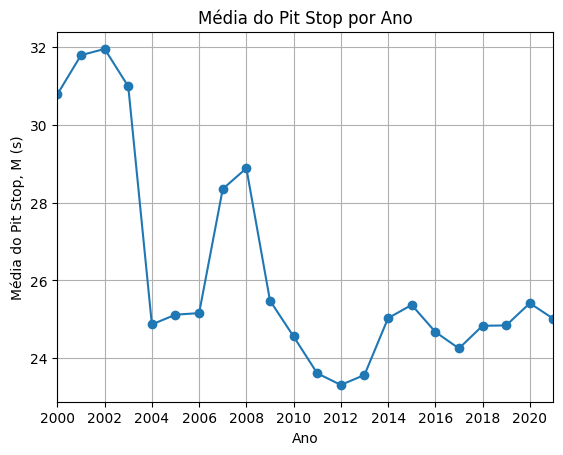

In [81]:
import matplotlib.pyplot as plt

md_pit_por_ano = df_clean.groupby('Year')['Pit_Time'].mean()
plt.plot(md_pit_por_ano.index, md_pit_por_ano.values, marker='o')
plt.xlabel('Ano')
plt.xlim(2000, 2021)
plt.xticks(range(2000, 2022, 2))
plt.ylabel('Média do Pit Stop, M (s)')

plt.title('Média do Pit Stop por Ano')
plt.grid(True)

Gráfico 2:

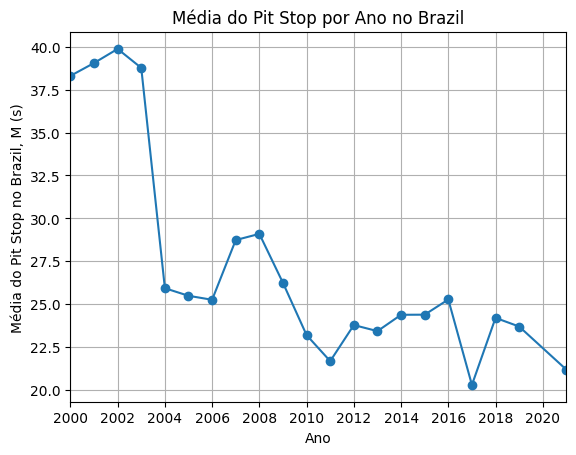

In [82]:
md_Brazil = pitstopsF1[pitstopsF1['Race'] == 'Brazil']
md_Brazil_pit = md_Brazil.groupby('Year')['Pit_Time'].mean()
plt.plot(md_Brazil_pit.index, md_Brazil_pit.values, marker='o')
plt.xlabel('Ano')
plt.xlim(2000, 2021)
plt.xticks(range(2000, 2022, 2))
plt.ylabel('Média do Pit Stop no Brazil, M (s)')

plt.title('Média do Pit Stop por Ano no Brazil')
plt.grid(True)

Gráfico 3:

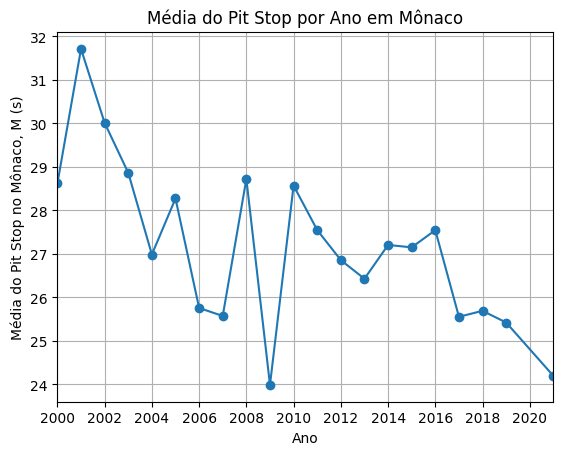

In [83]:
md_Brazil = pitstopsF1[pitstopsF1['Race'] == 'Monaco']
md_Brazil_pit = md_Brazil.groupby('Year')['Pit_Time'].mean()
plt.plot(md_Brazil_pit.index, md_Brazil_pit.values, marker='o')
plt.xlabel('Ano')
plt.xlim(2000, 2021)
plt.xticks(range(2000, 2022, 2))
plt.ylabel('Média do Pit Stop no Mônaco, M (s)')

plt.title('Média do Pit Stop por Ano em Mônaco')
plt.grid(True)

Gráfico 4:

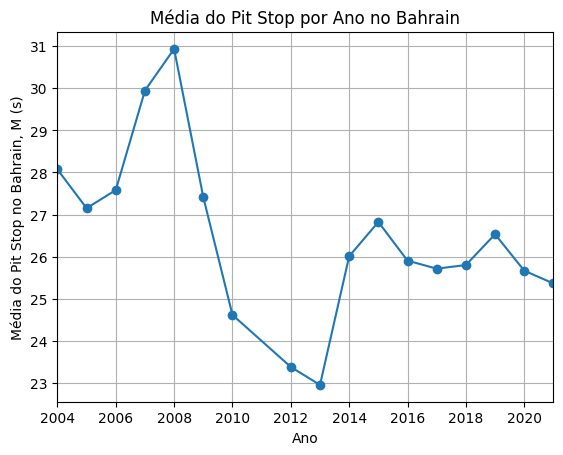

In [84]:
md_Brazil = pitstopsF1[pitstopsF1['Race'] == 'Bahrain']
md_Brazil_pit = md_Brazil.groupby('Year')['Pit_Time'].mean()
plt.plot(md_Brazil_pit.index, md_Brazil_pit.values, marker='o')
plt.xlabel('Ano')
plt.xlim(2004, 2021)
plt.xticks(range(2004, 2022, 2))
plt.ylabel('Média do Pit Stop no Bahrain, M (s)')

plt.title('Média do Pit Stop por Ano no Bahrain')
plt.grid(True)

Gráfico 5:

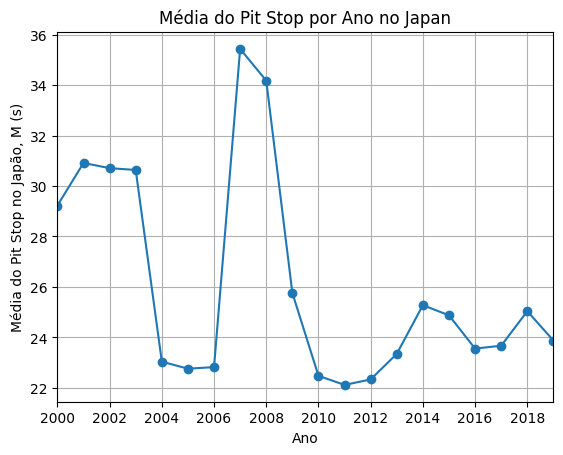

In [85]:
md_Brazil = pitstopsF1[pitstopsF1['Race'] == 'Japan']
md_Brazil_pit = md_Brazil.groupby('Year')['Pit_Time'].mean()
plt.plot(md_Brazil_pit.index, md_Brazil_pit.values, marker='o')
plt.xlabel('Ano')
plt.xlim(2000, 2019)
plt.xticks(range(2000, 2019, 2))
plt.ylabel('Média do Pit Stop no Japão, M (s)')

plt.title('Média do Pit Stop por Ano no Japan')
plt.grid(True)

##Variância e Desvio Padrão

Exemplo 1:

In [86]:
df = pd.read_csv("Pitstop_data_all.csv")

df['Pit_Time'] = pd.to_numeric(df['Pit_Time'], errors='coerce')

null_pit_times = df['Pit_Time'].isnull().sum()
print(f"Valores nulos encontrados no tempo de pitstops: {null_pit_times}")

pit_time_mean = df['Pit_Time'].mean()
pit_time_std = df['Pit_Time'].std()
pit_time_var = df['Pit_Time'].var()

print(f"Média do tempo de pit stop: {pit_time_mean:.2f} segundos")
print(f"Desvio padrão do tempo de pit stop: {pit_time_std:.2f} segundos")
print(f"Variância do tempo de pit stop: {pit_time_var:.2f} segundos²")


Valores nulos encontrados no tempo de pitstops: 409
Média do tempo de pit stop: 25.86 segundos
Desvio padrão do tempo de pit stop: 5.39 segundos
Variância do tempo de pit stop: 29.08 segundos²


Exemplo 2:

In [87]:
df_2021 = df[df['Year'] == 2021].copy()
df_2021['Pit_Time'] = pd.to_numeric(df_2021['Pit_Time'], errors='coerce')

null_pit_times = df_2021['Pit_Time'].isnull().sum()
print(f"Valores nulos encontrados no tempo de pitstops: {null_pit_times}")

pit_time_mean = df_2021['Pit_Time'].mean()
pit_time_std = df_2021['Pit_Time'].std()
pit_time_var = df_2021['Pit_Time'].var()

print(f"Média do tempo de pit stop no ano de 2021: {pit_time_mean:.2f} segundos")
print(f"Desvio padrão do tempo de pit stop no ano de 2021: {pit_time_std:.2f} segundos")
print(f"Variância do tempo de pit stop no ano de 2021: {pit_time_var:.2f} segundos²")

Valores nulos encontrados no tempo de pitstops: 110
Média do tempo de pit stop no ano de 2021: 25.01 segundos
Desvio padrão do tempo de pit stop no ano de 2021: 5.87 segundos
Variância do tempo de pit stop no ano de 2021: 34.45 segundos²


##Covariância

Covariância 1:

In [88]:
df = pd.read_csv("Pitstop_data_all.csv")

df['Pit_Time'] = pd.to_numeric(df['Pit_Time'], errors='coerce')

df_clean = df.dropna(subset=['Pit_Time', 'Lap_Pitted', 'Pit_Number'])

cov_pt_lp = df_clean['Pit_Time'].cov(df_clean['Lap_Pitted'])

print("COVARIÂNCIA:")
print(f"Tempo do pitstop vs Volta do pitstop: {cov_pt_lp:.2f}")


COVARIÂNCIA:
Tempo do pitstop vs Volta do pitstop: -4.72


Covariância 2:

In [89]:
cov_pt_pn = df_clean['Pit_Time'].cov(df_clean['Pit_Number'])

print("COVARIÂNCIA:")
print(f"Tempo do pitstop vs Número do pitstop: {cov_pt_pn:.2f}\n")

COVARIÂNCIA:
Tempo do pitstop vs Número do pitstop: -0.49



##Correlação

Correlação 1:

In [90]:
corr_pt_lp = df_clean['Pit_Time'].corr(df_clean['Lap_Pitted'])

print("CORRELAÇÃO:")
print(f"Tempo do pitstop vs Volta do pitstop: {corr_pt_lp:.2f}")

CORRELAÇÃO:
Tempo do pitstop vs Volta do pitstop: -0.06


Correlação 2:

In [91]:
corr_pt_pn = df_clean['Pit_Time'].corr(df_clean['Pit_Number'])

print("CORRELAÇÃO:")
print(f"Tempo do pitstop vs Número do pitstop: {corr_pt_pn:.2f}")

CORRELAÇÃO:
Tempo do pitstop vs Número do pitstop: -0.11


#Exercício em sala

##Mapa de calor

exemplo 1:

In [92]:
import plotly.express as px
fig3 = px.density_contour(pitstopsF1, x="Pit_Time", y="Lap_Pitted", title="Densidade de Contorno: Volta do pitstop vs Tempo do pitstop")
fig3.update_traces(contours_coloring="heatmap")
fig3.show()